In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
np.random.seed(42)

## Lecture 13B: From Notebooks to the Web: Github Pages, Web Servers, and Dash
December 5, 2022

## Housekeeping

- [Assignment #7](https://github.com/MUSA-550-Fall-2022/assignment-7) (including final project proposal) due on Wednesday
- Three more lectures! Python dashboards!

## Web-based Data Viz

We'll discuss ways to translate our analysis results to the Web in a meaningful way. We'll cover three methods to do so, each with their own pros and cons:

**Last lecture**

1. Embedding interactive charts on the Web via Github Pages

**This lecture**

2. Creating Web apps & dashboards using the Python library [Dash](https://dash.plot.ly/)

**Next week**

3. Creating Web apps & dashboards using the Python library [Panel](https://panel.holoviz.org/)


## Today: Web Servers and Dashboards with Dash

## Part 1: Web Servers

A few quick basics before we move on to interactive Web apps with Dash...

### Some (oversimplified) basics

- The browser needs a file --> it requests it via the HTTP protocol
- The web server receives the request, and if the requested file exists, sends it back to the browser using HTTP

<img src="imgs/web-server.png" width=800>

### Two main types:

**Static** and **dynamic**

### Static Web Servers

- Serves hosted HTML files to the browser "as-is"
- Response from the server is always the same — *static*
- Example: Github Pages

### Dynamic Web Servers

- Capable of serving *dynamic* content to browsers
- Extra software that executes *server-side* before sending the response back to the browser
- Common example: querying a database server
    - browser sends request for data with specific query parameters
    - server responds dynamically, sending the requested data

For more information: [Mozilla documentation](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_is_a_web_server)

### CARTO: a dynamic web server

<img src="imgs/carto-url.png" width=1200></img>

### Anatomy of a request

- **Base URL**: shown in blue
- **?**: separates the base URL from the query parameters
- **Query parameters**: tells the web server how to respond to the request
- **&**: separator between the query parameters

## Flask: a micro web framework in Python

A very lightweight package for framework for dynamic web apps

[Flask documentation](https://flask.palletsprojects.com/)

## Example 1: your first Flask app


- Store the code for our app in a ".py" file: 
- Create a "local" web server by executing our application code locally
- This allows us to build and test our app before deploying the code to a remote web server

## Running Python scripts from the command line

To start up our Flask app, we'll need to execute the Python script from the command line.


## Option A: Use the Terminal in VS Code

[VS Code](https://code.visualstudio.com/) has a built-in command line as part of its file editor interface.

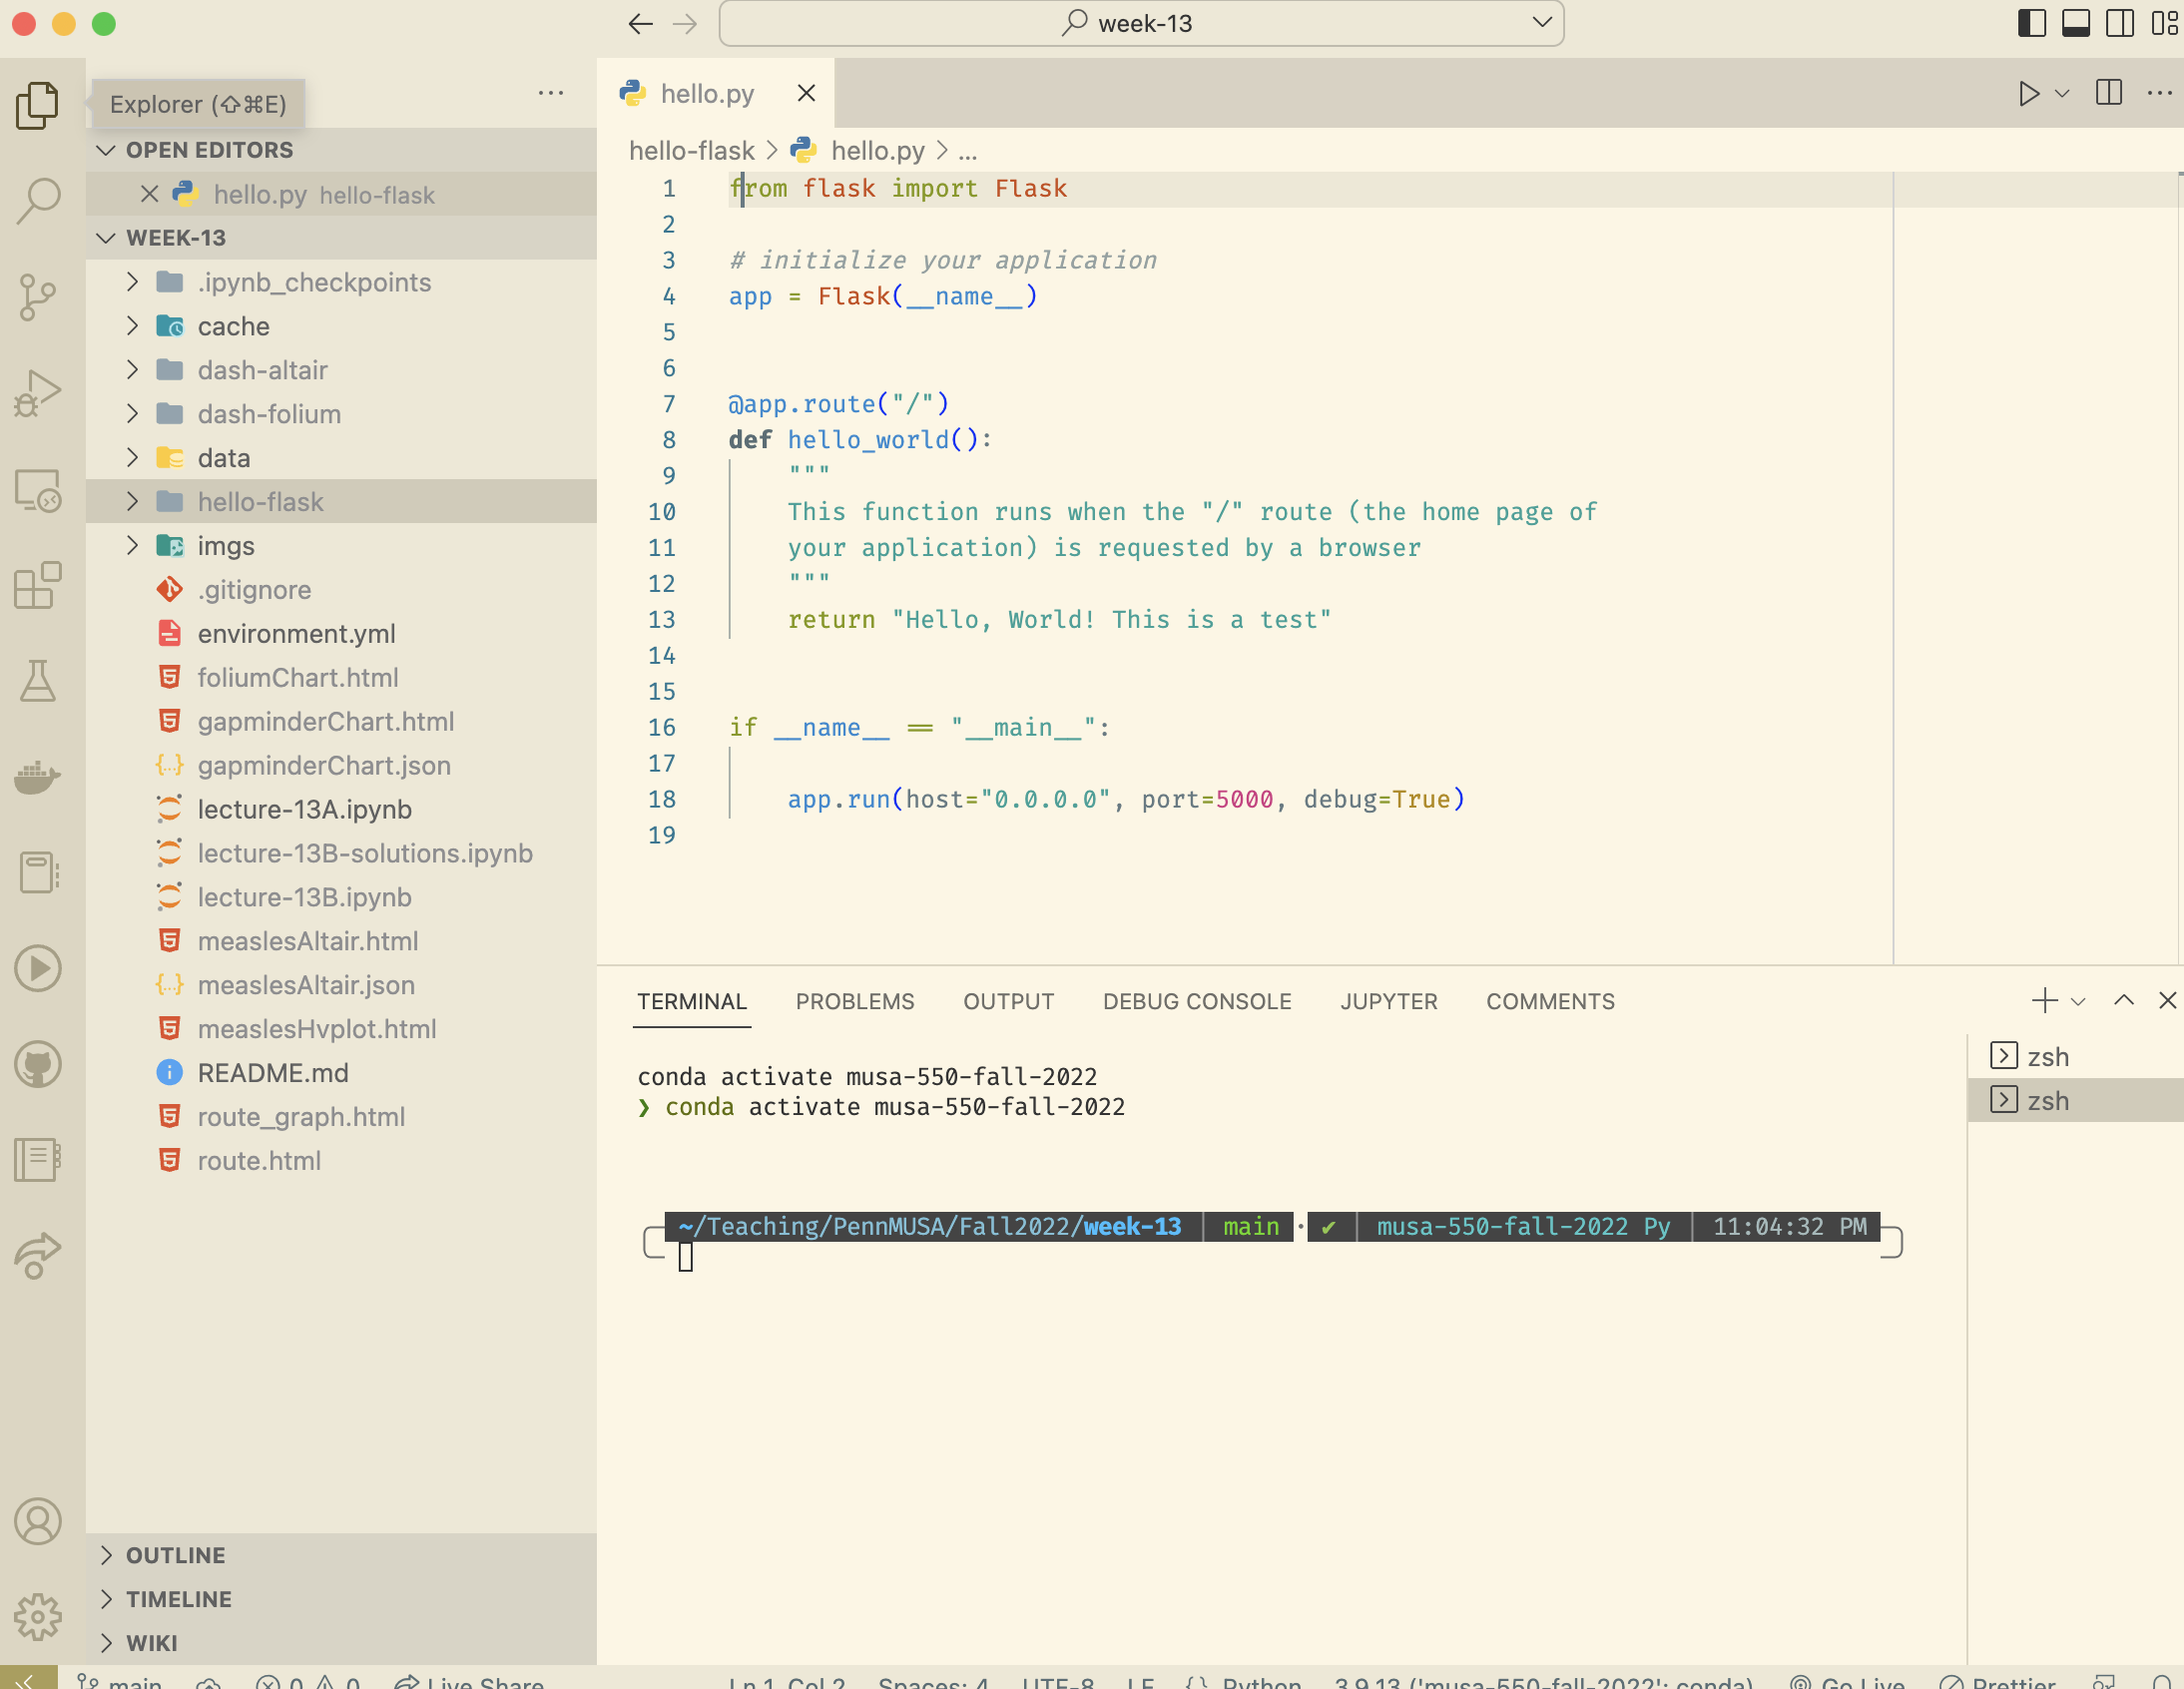

### Steps:


- Navigate to the "hello-flask" folder
- Click on the "hello.py" file to launch the file editor
- **Launch a new terminal window by clicking on "New -> Terminal"**

Flask code: [hello.py](https://github.com/MUSA-550-Fall-2022/week-13/blob/main/hello-flask/hello.py)

**Important: this won't work on Binder, it needs to be running on your local machine**

## Option B: Use the Terminal app (MacOS) or the Anaconda Prompt (Windows)

- Open up the Terminal or Anaconda Prompt app
- Navigate to the folder with this week's code and follow the steps below

## To start a local server

From the command line, run the following commands:

```bash
cd hello-flask
python hello.py
```

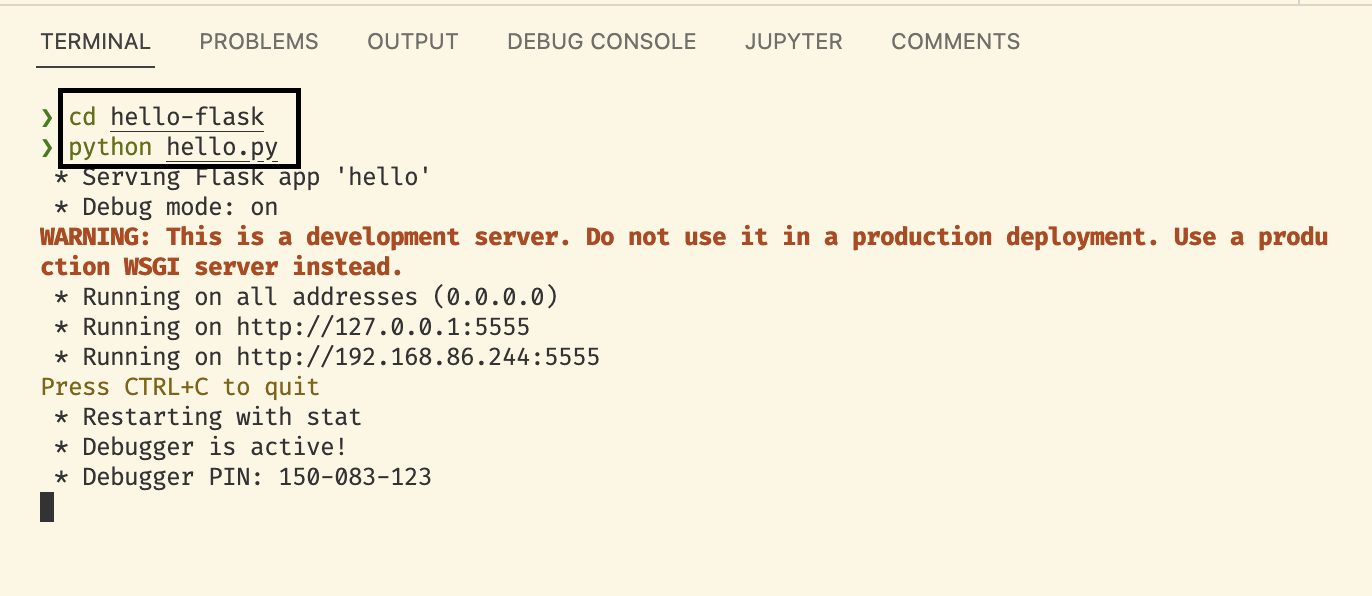

## The "python" command

- This will execute the `*.py` file
- Only the code below `if __name__ == '__main__':` gets executed

[StackOverflow answer](https://stackoverflow.com/questions/419163/what-does-if-name-main-do) about the if-name-main syntax in Python.

## Take a look at hello.py
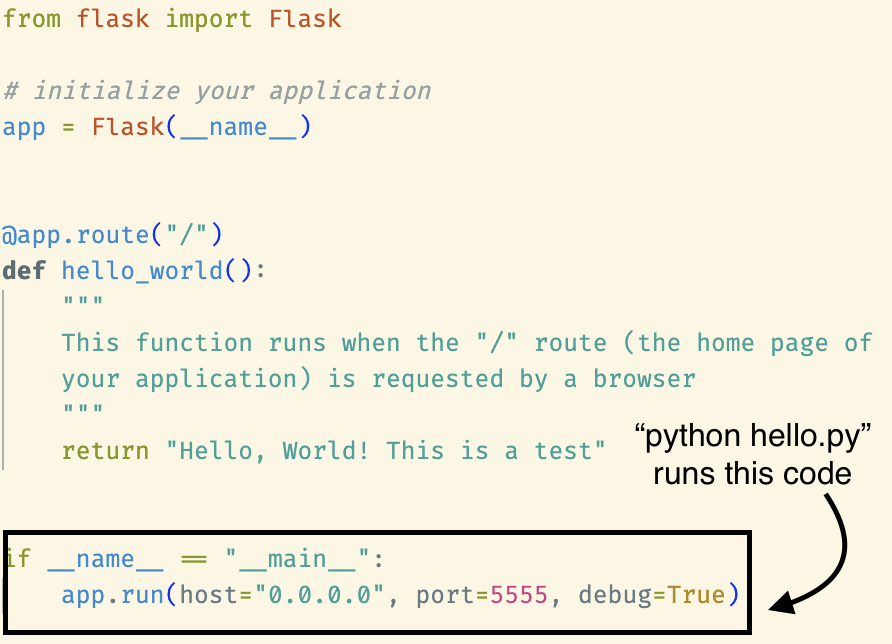


## View your application!

Navigate in the browser to: http://0.0.0.0:5555

You should see the text: "Hello, World!"

### Important: Windows Users

You will likely need to navigate to localhost:5000 instead of http://0.0.0.0:5555

Note: the web address http://0.0.0.0 is an alias for "localhost" — this means the web server is running locally on your computer.

## Editing your app with a running server

Try editing the `hello.py` file in your editor (either the Jupyter notebook editor or VS Code). Then save and reload the application page. You should see the app update to reflect the changes!

## Example 2: using templates

- Flask can load and render HTML files when specific routes are requested by the browser
- Templates should be stored in a `templates/` directory
- The `hello-template.py` app loads the `templates/hello.html` when the `/hello/` route is requested by the browser

Flask code: [hello-template.py](https://github.com/MUSA-550-Fall-2022/week-13/blob/main/hello-flask/hello-template.py)

## From the terminal window

```bash
python hello-template.py
```

The main page ("/") renders the same thing as the previous app ("Hello, World!").

**Navigate to the "/hello/" route and you should see:**

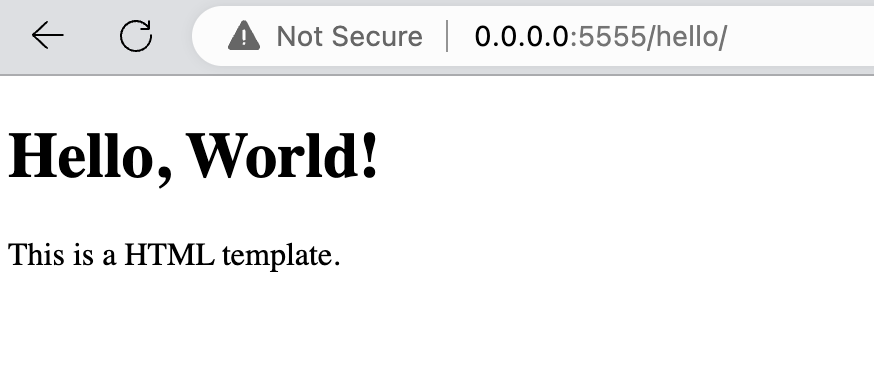

## Example 3: setting up an API with request parameters

`hello-api.py`: a more sophisticated example using **request parameters**

Run: 

```bash
python hello-api.py
```

Flask code: [hello-api.py](https://github.com/MUSA-550-Fall-2022/week-13/blob/main/hello-flask/hello-api.py)

## Navigate to the "/shootings" route

This uses default request parameters: days = 90 and fatal = 0

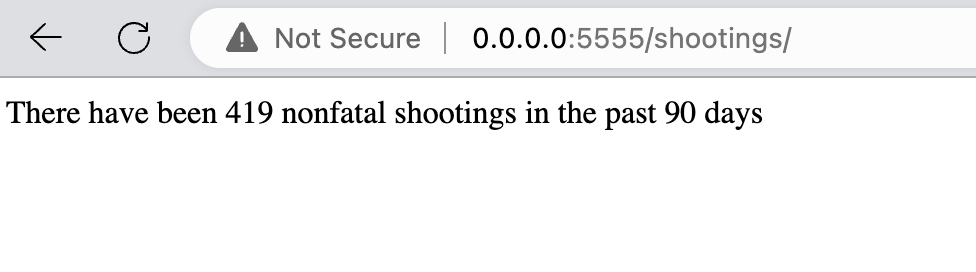

## Now pass "days" and "fatal" parameters

This returns the number of fatal/nonfatal shootings in the past X "days"

Let's try fatal = 1 and days = 30:

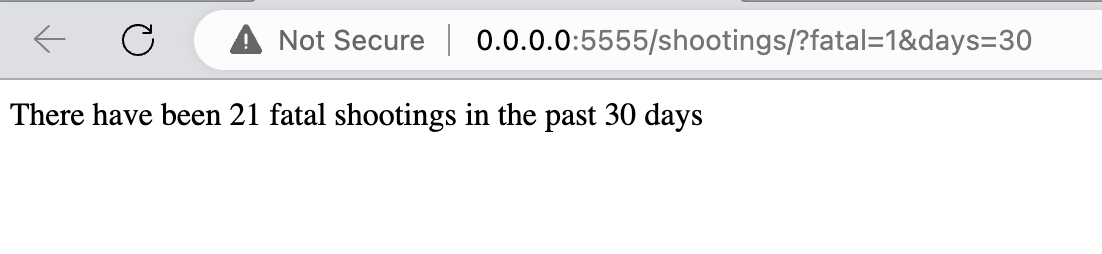

## Getting closer to a more realistic use case...

**Steps:**
1. Get request parameters from the browser (input by the user)
1. Query CARTO database for data based on that input
1. Perform an operation on that data (in this case, count number of shootings)
1. Return computed result back to the browser

### Note: If you receive a "OSError: Address already in use"

- If you encounter the "Address already in use" error, you are trying to run multiple Flask servers on the same port
- The port is the number after the address; e.g., for http://0.0.0.0:5555/, the port is 5555
- The easiest solution: run Ctrl-C to end all of the Flask servers but one, or change the `port=5555` keyword when initialize the app in the Python script



## Now, that we have the basics on to a more advanced library...

## Part 4: Dash


The result of Python programmers asking the question: **can we build a dashboard just in Python?**

The answer is yes...for the most part.

You still need to use *some* CSS styling and know about different HTML elements. But everything is coded in Python.

## Dash

- Built on Flask, similar web framework setup
- Construct Python wrappers of common HTML elements, like "div", "p", etc.
- Allows you to define layout of page purely in Python
- Use Python functions to control how browser interacts with the app — just like Flask

## Benefits

- Everything can be done in Python — no more HTML templates
- Use Python to define how user input elements (e.g., sliders) interact with server — no more custom Javascript
- Very sleek, beautiful widgets and interactive components built in to the library
- Can handle Markdown too
- Good tutorials and user guide — https://dash.plot.ly/

## Downsides

- Built to be used with the [Plotly](https://plot.ly/python) visualization library
- Private company that has open-sourced their interactive visualization library
- A bit more work to get non-Plotly visualizations working — need to use our IFrame trick

## The general workflow

In your Python Dash app, there are two main steps:

1. Define the HTML layout, e.g., "div" elements, slider elements, etc. 
1. Define functions that take inputs from the interactive widgets from Step 1. and return the output for other HTML elements. 
    - When the user changes a slider, dropdown, etc, the function will run, and return the updated output

## Dash HTML components = "the app layout"

- Wrappers for all of the common HTML elements
- Stored in the `dash_html_components` module

See: https://dash.plot.ly/dash-html-components

In [2]:
# The standard import
from dash import html

## Dash HTML Example

```
html.Div([
    html.H1('Hello Dash'),
    html.Div([
        html.P('Dash converts Python classes into HTML'),
        html.P('This conversion happens behind the scenes by Dash's JavaScript front-end')
    ])
])
```

This gets converted automatically to the following HTML in your web app:

```
<div>
    <h1>Hello Dash</h1>
    <div>
        <p>Dash converts Python classes into HTML</p>
        <p>This conversion happens behind the scenes by Dash's JavaScript front-end</p>
    </div>
</div>
```

## Dash core components = "widgets"

- A set of fancy widgets already built in! 
- Stored in the `dash_core_components` module

See: https://dash.plot.ly/dash-core-components

In [3]:
# The standard import for these components
from dash import dcc

### Note: Markdown is also supported!

Use the `dcc.Markdown()` object to automatically convert Markdown into HTML in your web apps!

## Reference: HTML and CSS tutorials 

The core components and HTML components in Dash remove most of the direct HTML/CSS, but still good to know some of the basics:

- [HTML Tutorial](https://developer.mozilla.org/en-US/docs/Learn/HTML/Introduction_to_HTML)
- [CSS Tutorial](https://developer.mozilla.org/en-US/docs/Learn/CSS/Introduction_to_CSS)

**Useful to keep these references handy if you are unsure about syntax for HTML and/or CSS**

## The Dash Getting Started Guide

https://dash.plot.ly/getting-started

## Combining Dash with Altair and Folium

- You are welcome to incorporate Plotly visualizations directly into your dashboard, but it can get complicated quickly
- I am not a huge fan of Plotly's API and documentation
- We will focus on a few examples showing Altair + Dash and Folium + Dash

**Key:** any valid ".html" block can be embedded within an "IFrame" element

## Two key elements of Dash apps

- You must define the "app.layout" — this is your HTML layout
- You must define your *callback* functions and the input/output that they take.
    - You *mark* certain functions as callbacks so Dash knows they interact with your HTML code.

### Steps:

1. Define a IFrame() element as part of the layout
1. Given some user input, generate our Altair charts and save them as HTML
1. Assign the chart HTML to the IFrame on our page

## Let's see some Dash + Altair examples...

Two examples in the "dash-altair/" folder...

## Visualizing the "penguins" dataset

Just like with Flask, we can run from command line:

```bash
python dash_altair_penguins.py
```

[Dash app](https://github.com/MUSA-550-Fall-2022/week-13/blob/main/dash-altair/dash_altair_penguins.py)

## Translating the shootings app to Dash

We can run from the command line:

```bash
python dash_altair_shootings.py
```

[Dash app](https://github.com/MUSA-550-Fall-2022/week-13/blob/main/dash-altair/dash_altair_shootings.py)

## More information: Dash user guide

- https://dash.plot.ly/getting-started
- Very good series of chapters illustrating different aspects of Dash
- Relies on Plotly visualizations but idea is the same for IFrame elements

## One more Dash example: Dash + Folium

- Since Folium plots can be converted to HTML, they can be displayed in Dash apps as HTML IFrame elements
- We can use Dash widgets to control what gets displayed on the map

From the base repository folder, run

```
cd dash-folium
python app.py
```

to start the example

## Deploying a Dash app

- By default, Dash apps run on "localhost" - you can only access them on your own machine. 
- To share a Dash app, you need to "deploy" your Dash app to a server 
- Plotly has an "enterprise" (commercial) solution for this but it costs $$$

## Recommended solution: Heroku

- Heroku makes deployment of arbitrary apps and dashboards very easy
- **Key:** Provides a free tier to get you started 

### Getting started

- First, signup for a Heroku free [account](https://signup.heroku.com)
- Download and [install the command line interface (CLI)](https://devcenter.heroku.com/articles/getting-started-with-python#set-up). 
- Once you are set up follow the instructions to log into the CLI.

## Launching your app on Heroku

The Dash docs contain a complete example of launching a simple Dash app to Heroku:

https://dash.plotly.com/deployment#heroku-for-sharing-public-dash-apps-for-free


Make sure you've signed up for an account and downloaded the CLI first! (see the previous slide)

## Summary: web-based visualizations so far

- Github Pages via [MUSA-550-Fall-2022/github-pages-starter](https://github.com/MUSA-550-Fall-2022/github-pages-starter)
    - Supports: Folium, Altair, Hvplot, HTML files via IFrames
    - User cannot use the interactive features of the charts, but cannot change the content dynamically
- Flask/Dash 
    - Supports: Folium, Altair, Hvplot, HTML files via IFrames
    - Allows for more complex user interactions via a set of dynamic widgets

## On Wednesday: [Panel](https://panel.holoviz.org/)

- Example gallery: https://panel.holoviz.org/gallery/index.html
- Other demos from a Panel developer: https://jsignell.github.io/

## Exercise: modifying the Dash shootings apps

Let's modify either the Altair-based or Folium-based Dash app for the shootings data in Philadelphia to **include a dropdown that allows the user to specify which race to show data for.**

**Steps**
- First, take a look at the documentation for the `Dropdown` object in Dash's [core component library](https://dash.plot.ly/dash-core-components): https://dash.plot.ly/dash-core-components/dropdown
- Modify the layout of the app to include a new `Div` element that contains the Dropdown element
- Modify your `render()` function to accept the value of the race dropdown as an input to the function — then, you can use that value to select the appropriate subset of your data frame to plot!